<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

# Pandas

Manipulating tabular data

## `pandas`

- Provides python a `DataFrame`
- Structured manipulation tools
- Built on top of `numpy`
- Huge growth from 2011-2012
- Very **efficient**
- Great for *medium* data

Resources

- [pandas.pydata.org](http://pandas.pydata.org/)
- [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) by Wes McKinney
- [Data Wrangling Kung Fu with Pandas](vimeo.com/63295598) by Wes McKinney
- [Cheat sheet](https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf) by Quandl

### Why `pandas`?

> 80% of the effort in data analysis is spent cleaning data. [Hadley Wickham](http://vita.had.co.nz/papers/tidy-data.pdf)

Efficency

- Different views of data
- [Tidy data](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham

Raw data is often in the wrong format

- How often to you download an array ready for array-oriented computing?
- e.g. `scikit-learn` interface

Storage may be best in a different format

- Sparse representations
- Upload to database



## Outline

**Simple example**

- Reshaping: `pd.pivot` and `pd.melt`
- Many basic operations: add, remove, indexing
- Missing values


## Simple example using the Walrus data

In [4]:
import os
import pandas as  pd
import numpy as np

### Creating a `DataFrame`

df = pd.read_csv(filename)
print df


**Why store it this way?**

- Different type
- Different metric

### Converting the DateTimeUTC Column

NumPy datetime64 dtype

In [13]:
filename = os.path.join('Walrus_Data','Walruses.csv')
df = pd.read_csv(filename, parse_dates=True, 
                 thousands=',')
df.head(5)

,Walrus,DateTimeUTC,Xcoord,Ycoord,Behav,Longitude,Latitude
0,271,5/31/2008 19:25,95616.95,-528324.60,1.00900,-167.956095,65.248715
1,271,6/1/2008 3:24,84741.71,-511653.75,1.00050,-168.177987,65.401217
2,271,6/1/2008 11:24,71834.45,-491176.95,1.00625,-168.444360,65.587969
3,271,6/1/2008 19:24,65275.80,-478935.62,1.02025,-168.580284,65.699143
4,271,6/2/2008 3:24,69343.24,-473948.91,1.00775,-168.489215,65.742984


### Selecting each Walrus

In [14]:
walrus271 = df.ix[df.Walrus == 271]
walrus281 = df.ix[df.Walrus == 281]
walrus322 = df.ix[df.Walrus == 322]

### Reshape with `pivot`

- Question: What is the average behavior for each date?
- How many observations do I have for each Walrus?

In [15]:
walrus_behavior = df.pivot(index='DateTimeUTC', columns='Walrus', values='Behav') #row, column, values (optional)
walrus_behavior.head(10)

Walrus,271,281,322
DateTimeUTC,,,
5/31/2008 19:25,1.00900,NaN,NaN
6/1/2008 11:24,1.00625,NaN,NaN
6/1/2008 19:24,1.02025,NaN,NaN
6/1/2008 3:24,1.00050,NaN,NaN
6/10/2008 10:24,NaN,1.29125,NaN
6/10/2008 11:24,1.19200,NaN,NaN
6/10/2008 18:24,NaN,1.30925,NaN
6/10/2008 19:24,1.14750,NaN,NaN
6/10/2008 2:24,NaN,1.30775,NaN


In [16]:
walrus_behavior.index

Index([u'5/31/2008 19:25', u'6/1/2008 11:24', u'6/1/2008 19:24',
       u'6/1/2008 3:24', u'6/10/2008 10:24', u'6/10/2008 11:24',
       u'6/10/2008 18:24', u'6/10/2008 19:24', u'6/10/2008 2:24',
       u'6/10/2008 3:24', 
       ...
       u'9/6/2008 3:24', u'9/7/2008 11:24', u'9/7/2008 19:24',
       u'9/7/2008 3:24', u'9/8/2008 11:24', u'9/8/2008 19:24',
       u'9/8/2008 3:24', u'9/9/2008 11:24', u'9/9/2008 19:24',
       u'9/9/2008 3:24'],
      dtype='object', name=u'DateTimeUTC', length=454)

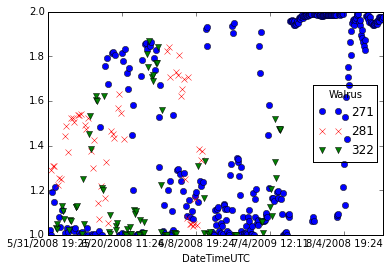

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
walrus_behavior.plot(style=['bo','rx','gv'])

###Columns access

In [18]:
walrus_behavior[322]

DateTimeUTC
5/31/2008 19:25        NaN
6/1/2008 11:24         NaN
6/1/2008 19:24         NaN
6/1/2008 3:24          NaN
6/10/2008 10:24        NaN
6/10/2008 11:24        NaN
6/10/2008 18:24        NaN
6/10/2008 19:24        NaN
6/10/2008 2:24         NaN
6/10/2008 3:24         NaN
6/10/2009 12:11    1.03200
6/10/2009 20:11    1.02425
6/10/2009 4:11     1.04950
6/11/2008 10:24        NaN
6/11/2008 11:24        NaN
6/11/2008 18:24        NaN
6/11/2008 19:24        NaN
6/11/2008 2:24         NaN
6/11/2008 3:24         NaN
6/11/2009 12:11    1.12850
6/11/2009 20:11    1.10800
6/11/2009 4:11     1.06925
6/12/2008 10:24        NaN
6/12/2008 11:24        NaN
6/12/2008 18:24        NaN
6/12/2008 19:24        NaN
6/12/2008 2:24         NaN
6/12/2008 3:24         NaN
6/12/2009 12:11    1.02250
6/12/2009 20:11    1.06825
                    ...   
9/11/2008 19:24        NaN
9/11/2008 3:24         NaN
9/12/2008 11:24        NaN
9/12/2008 19:24        NaN
9/12/2008 3:24         NaN
9/13/2008 3:24  

In [19]:
walrus_behavior[271].values

array([ 1.009  ,  1.00625,  1.02025,  1.0005 ,      nan,  1.192  ,
            nan,  1.1475 ,      nan,  1.214  ,      nan,      nan,
            nan,      nan,  1.07925,      nan,  1.036  ,      nan,
        1.1125 ,      nan,      nan,      nan,      nan,  1.00725,
            nan,  1.0305 ,      nan,  1.01325,      nan,      nan,
            nan,      nan,  1.02475,      nan,  1.018  ,      nan,
        1.029  ,      nan,      nan,      nan,      nan,  1.008  ,
            nan,  1.     ,      nan,  1.0105 ,      nan,      nan,
            nan,      nan,  1.001  ,      nan,  1.03075,      nan,
        1.     ,      nan,      nan,      nan,      nan,  1.00475,
            nan,  1.00075,      nan,  1.0015 ,      nan,      nan,
            nan,      nan,  1.01675,      nan,  1.48475,      nan,
        1.     ,      nan,      nan,      nan,      nan,  1.75675,
            nan,  1.79025,      nan,  1.676  ,      nan,      nan,
            nan,      nan,  1.8135 ,      nan,  1.821  ,      

###Row access

In [20]:
walrus_behavior.ix[0]

Walrus
271    1.009
281      NaN
322      NaN
Name: 5/31/2008 19:25, dtype: float64

In [21]:
walrus_behavior.ix['6/1/2008 11:24']

Walrus
271    1.00625
281        NaN
322        NaN
Name: 6/1/2008 11:24, dtype: float64

###Range access

In [22]:
print walrus_behavior.ix[2:4]

Walrus              271  281  322
DateTimeUTC                      
6/1/2008 19:24  1.02025  NaN  NaN
6/1/2008 3:24   1.00050  NaN  NaN


How many observations do I have for each model?

In [24]:
walrus_behavior.count()

Walrus
271    314
281     55
322     85
dtype: int64

### Plotting the walrus behavior

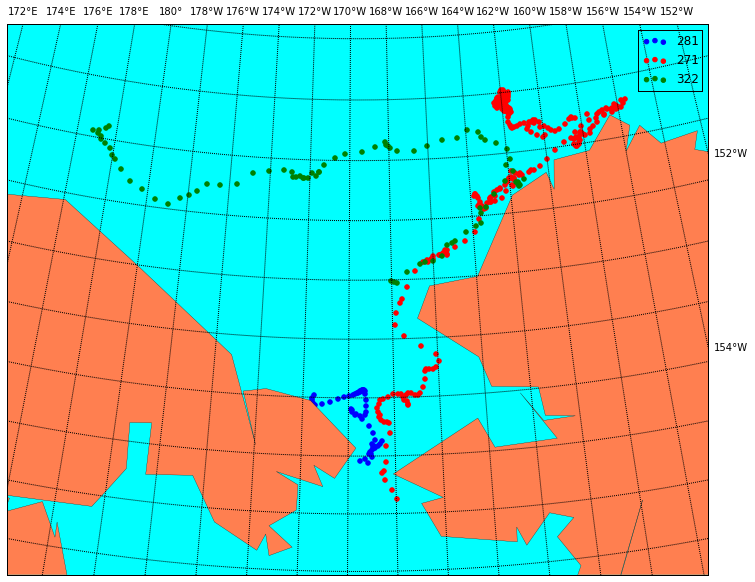

In [28]:
from mpl_toolkits.basemap import Basemap

lons = walrus281.Longitude.values
lats = walrus281.Latitude.values
lons_c=np.average(lons)
lats_c=np.average(lats)
#map = Basemap(projection='mill',llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80)
map = Basemap(width=1400000,height=1100000,projection='lcc', resolution='c',lat_1=45.,lat_2=55.,lat_0=lats_c+2,lon_0=lons_c)
fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])
x, y = map(lons,lats)
map.scatter(x,y,color='b',label='281')

# now for walrus 271
lons = walrus271.Longitude.values
lats = walrus271.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='r',label='271')

# now for walrus 322
lons = walrus322.Longitude.values
lats = walrus322.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='g',label='322')
plt.legend()